In [2]:
#Varibles explored:
# librac: If some people in your community suggested that a book this person wrote which said Blacks are inferior should be taken out of your public library, would you favor removing this book, or not?
# libmslm: (Now consider a Islamic religious leader who preaches hatred of the United States…) If some people in your community suggested that a book this person wrote which preaches hatred of the United States should be taken out of your public library, would you favor removing this book, or not?
# libath: (There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all churches and religion…) If some people in your community suggested that a book this person wrote against churches and religion should be taken out of your public library, would you favor removing this book, or not?
# partyid: Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what?


In [38]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#import data
import pandas as pd

var_list = ['libracy', 'librac', 'libmslmy', 'libmslm', 'libathy', 'libath', 'partyid', 'year']
output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0

for k in range(37):
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1 + k) + '.csv'
    print(url)
    df = pd.read_csv(url, low_memory=False)

    if phase == 0:

        df[var_list].to_csv(output_file, mode=modes[phase], header=True, index=False)
    else:

        df[var_list].to_csv(output_file, mode=modes[phase], header=False, index=False)

    phase = 1
    k += 1


https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
https://github.com/DS3001/gss_zip/raw/main/gss_2.csv
https://github.com/DS3001/gss_zip/raw/main/gss_3.csv
https://github.com/DS3001/gss_zip/raw/main/gss_4.csv
https://github.com/DS3001/gss_zip/raw/main/gss_5.csv
https://github.com/DS3001/gss_zip/raw/main/gss_6.csv
https://github.com/DS3001/gss_zip/raw/main/gss_7.csv
https://github.com/DS3001/gss_zip/raw/main/gss_8.csv
https://github.com/DS3001/gss_zip/raw/main/gss_9.csv
https://github.com/DS3001/gss_zip/raw/main/gss_10.csv
https://github.com/DS3001/gss_zip/raw/main/gss_11.csv
https://github.com/DS3001/gss_zip/raw/main/gss_12.csv
https://github.com/DS3001/gss_zip/raw/main/gss_13.csv
https://github.com/DS3001/gss_zip/raw/main/gss_14.csv
https://github.com/DS3001/gss_zip/raw/main/gss_15.csv
https://github.com/DS3001/gss_zip/raw/main/gss_16.csv
https://github.com/DS3001/gss_zip/raw/main/gss_17.csv
https://github.com/DS3001/gss_zip/raw/main/gss_18.csv
https://github.com/DS3001/gss_zip/raw

In [40]:
df = pd.read_csv(output_file)
df.shape[0]

72390

In [41]:
print(df['librac'].unique())
print(df['libmslm'].unique())
print(df['libath'].unique())
print(df['partyid'].unique())
print(df['year'].unique())

[nan 'remove' 'not remove']
[nan 'not remove' 'remove']
['not remove' 'remove' nan]
['independent, close to democrat' 'not very strong democrat'
 'independent (neither, no response)' 'strong democrat'
 'not very strong republican' 'independent, close to republican'
 'strong republican' 'other party' nan]
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]


In [42]:
# The code book states that for 'librac','libmslm', 'libath' there should be both a label 'remove' and 'not reme'
# As well as 'reserved codes' like 'don't know', 'not applicable', 'skipped on web' it seems that the reserved data is not in the dataset

In [43]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac     34340
libmslm    60970
libath     29700
partyid      485
year           0
dtype: int64


In [44]:
#I wanted to compare the responses to the gender-neutral question with the original question by using cross-tabulation to see if changing the wording of the question to remove gender-specific language had an impact on individual responses. The cross-tabulation results revealed that there is a distinct separation between respondents who chose 'not remove' and 'remove' responses for both variables. This indicates that individuals who selected 'not remove' for one variable tended to do the same for the other variable, and the same trend held for 'remove' responses.
cross_tab_librac = pd.crosstab(df['librac'], df['libracy'])
print(cross_tab_librac)
cross_tab_libmslm = pd.crosstab(df['libmslm'], df['libmslmy'])
print(cross_tab_libmslm)
cross_tab_libmslm = pd.crosstab(df['libath'], df['libathy'])
print(cross_tab_libmslm)

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [45]:
#I'm going to combine the orginial variable with the Gender Neutral Wording version to diminish the lack of data point


In [46]:
df['librac'] = df['librac'].mask(df['librac'].isna(), df['libracy'])
df['libmslm'] = df['libmslm'].mask(df['libmslm'].isna(), df['libmslmy'])
df['libath'] = df['libath'].mask(df['libath'].isna(), df['libathy'])

df.to_csv('raw_gss_data_url.csv', index=False)


In [47]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)
df.shape[0]

librac     31848
libmslm    58475
libath     27198
partyid      485
year           0
dtype: int64


72390

In [48]:
#I'm going to drop all rows were 'librac','libmslm', 'libath' have missing data

In [49]:
df = df.dropna(subset=['librac', 'libmslm', 'libath'], how='all') #the how= 'all' I looked up and W3Schools explained it

In [50]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac      5264
libmslm    31891
libath       614
partyid      310
year           0
dtype: int64


In [51]:
#To get ride of the last two missing data points I'm going to drop from 'libath' and 'partyid'

In [52]:
df = df.dropna(subset=['libath', 'partyid'])

In [53]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac      5158
libmslm    31289
libath         0
partyid        0
year           0
dtype: int64


In [54]:
df = df.dropna(subset=['librac'])

In [55]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac         0
libmslm    26293
libath         0
partyid        0
year           0
dtype: int64


In [56]:
#libmslm: recorded since 2008,librac: recorded since 1976, libath: recorded since 1972, partyid: recorded since 1972
#because libmslm began being recorded so much later then the other questions I'm going to make two different tables, one that excludes libmslm and one that includes libmslm

church_race = df[['librac', 'libath', 'partyid','year']]
church_race.to_csv('church_race.csv', index=False)




In [57]:
df = df.dropna(subset=['libmslm'])
church_race_religion = df[['librac', 'libmslm', 'libath', 'partyid', 'year']]
church_race_religion.to_csv('church_race_religion.csv', index=False)


In [59]:
na_counts = church_race_religion[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac     0
libmslm    0
libath     0
partyid    0
year       0
dtype: int64


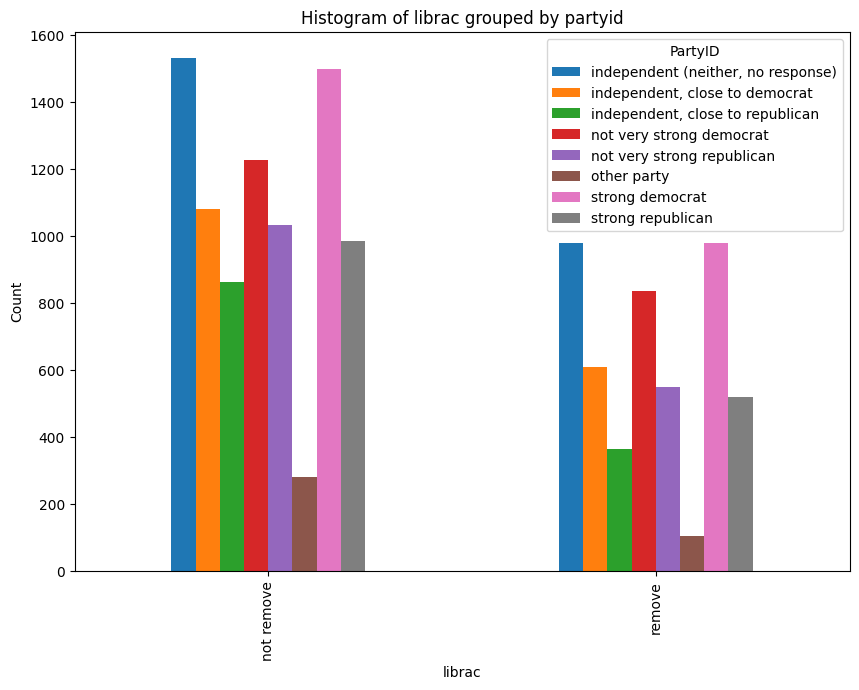

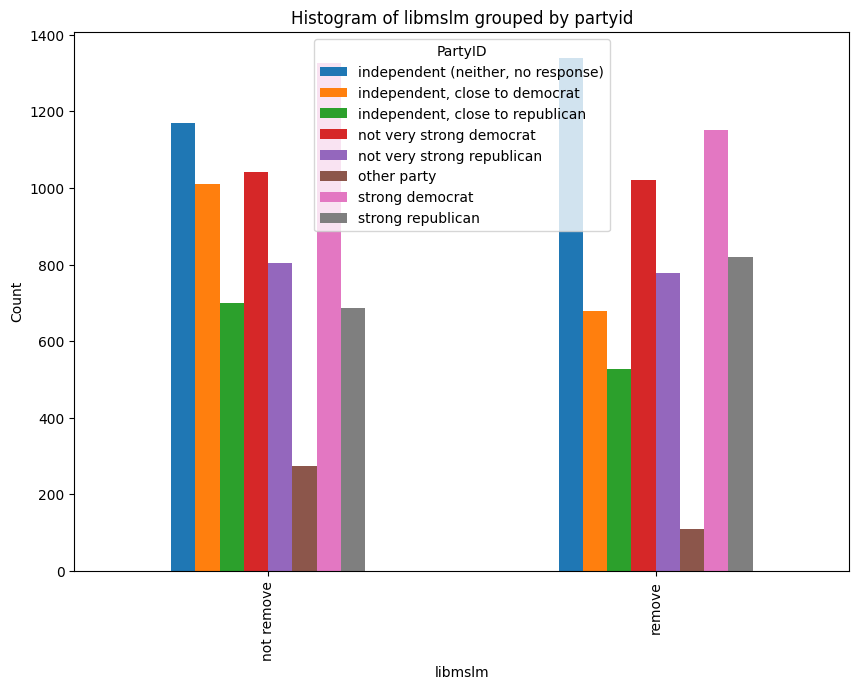

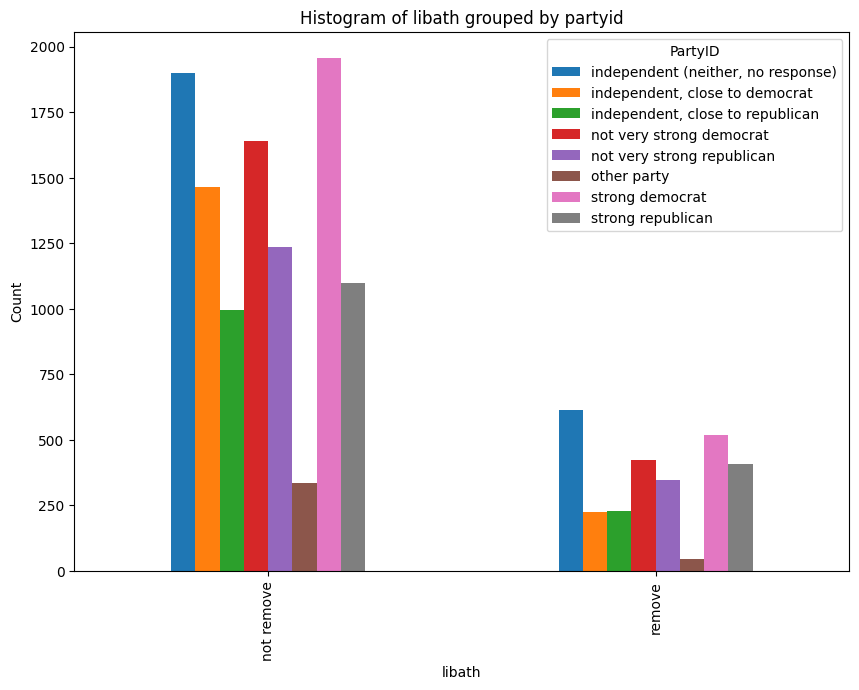

In [62]:


columns_to_plot = ['librac', 'libmslm', 'libath']

for col in columns_to_plot:

    cross = pd.crosstab(church_race_religion[col], church_race_religion['partyid'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by partyid')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='PartyID')
    plt.show()


In [64]:
# I'm going to group partyid we can change the grouping if there is way you would think would be better

party_grouping = {
    'independent, close to democrat': 'independent/other party',
    'independent (neither, no response)': 'independent/other party',
    'independent, close to republican': 'independent/other party',
    'other party': 'independent/other party',
    'strong republican': 'republican',
    'not very strong republican': 'republican',
    'strong democrat': 'democrat',
    'not very strong democrat': 'democrat'
}

org_party_church_race_religion = church_race_religion.copy()
org_party_church_race_religion['party_grouped'] = org_party_church_race_religion['partyid'].replace(party_grouping)
org_party_church_race_religion.to_csv('org_party_church_race_religion.csv', index=False)

In [101]:
#I'm going to calculate the percentage of "remove" responses vs. "not remove" responses for each year for each varible I'm going to do this by melting the data this was in the reading for the first homework and in the vizualization week

melted_org_party_church_race_religion = org_party_church_race_religion.melt(id_vars=['year', 'party_grouped'], value_vars=['librac', 'libmslm', 'libath'],
                    var_name='question', value_name='response')

response_counts = melted_org_party_church_race_religion.groupby(['year', 'question', 'response', 'party_grouped']).size().reset_index(name='count')
total_counts = response_counts.groupby(['year', 'question'])['count'].transform('sum')
response_counts['proportion'] = (response_counts['count'] / total_counts) * 100
df = response_counts
print (df)

     year question    response            party_grouped  count  proportion
0    2008   libath  not remove                 democrat    325   25.530244
1    2008   libath  not remove  independent/other party    380   29.850746
2    2008   libath  not remove               republican    231   18.146112
3    2008   libath      remove                 democrat    116    9.112333
4    2008   libath      remove  independent/other party    120    9.426551
..    ...      ...         ...                      ...    ...         ...
139  2022   librac  not remove  independent/other party    609   27.594019
140  2022   librac  not remove               republican    300   13.593113
141  2022   librac      remove                 democrat    279   12.641595
142  2022   librac      remove  independent/other party    430   19.483462
143  2022   librac      remove               republican    185    8.382420

[144 rows x 6 columns]


Results Section Code:

In [83]:

pivot_df = df.pivot_table(index=['question', 'party_grouped'],
                          columns='response', values='count', fill_value=0)
pivot_df


response                          not remove   remove
question party_grouped                               
libath   democrat                    449.875  117.625
         independent/other party     587.125  139.250
         republican                  291.875   94.125
libmslm  democrat                    296.000  271.500
         independent/other party     394.375  332.000
         republican                  186.125  199.875
librac   democrat                    340.750  226.750
         independent/other party     469.375  257.000
         republican                  252.500  133.500

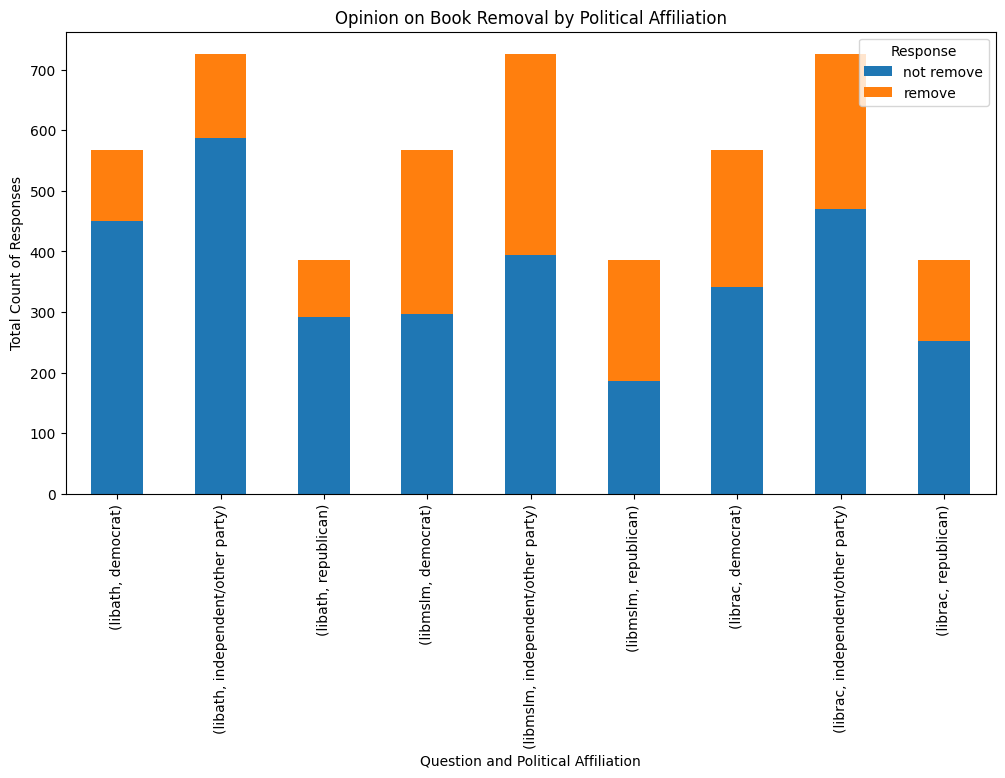

In [84]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Opinion on Book Removal by Political Affiliation')
plt.xlabel('Question and Political Affiliation')
plt.ylabel('Total Count of Responses')
plt.legend(title='Response')

plt.show()

<Axes: xlabel='count', ylabel='response'>

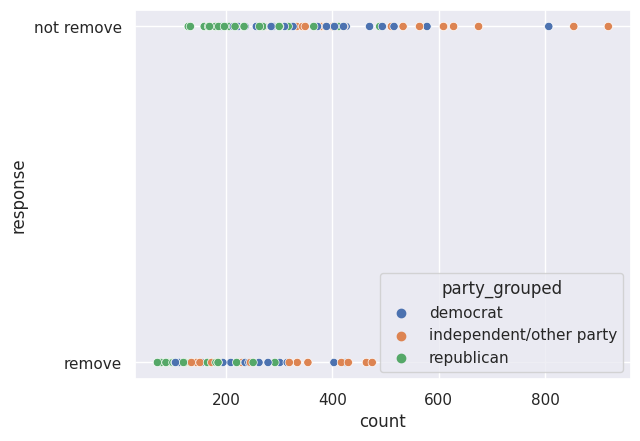

In [107]:
sns.scatterplot(data=df, x='count', y='response',hue='party_grouped')
